In [1]:
from river import (
    naive_bayes,
    datasets,
    tree
)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import (
    Experiment,
    ArtificialDataStream,
    LabelShiftDataStream,
    HyperPlaneStream,
)

import warnings
warnings.filterwarnings('ignore')

## TODO:
* Hyperparameter tuning
* Color plots
* Add drift variable to plots

## Experiments

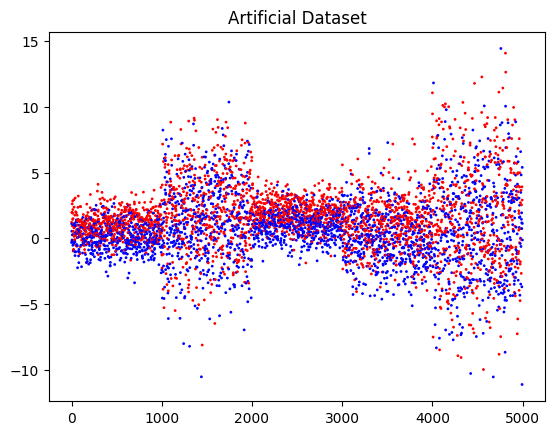

Finding optimal parameters for error detectors
Processing detector JSWIN with params alpha=0.3
Processing detector JSWIN with params alpha=0.4
Processing detector JSWIN with params alpha=0.45
Processing detector JSWIN with params alpha=0.5
Processing detector JSWIN with params alpha=0.55
Processing detector JSWIN with params alpha=0.6
Processing detector JSWIN with params alpha=0.65
Processing detector JSWIN with params alpha=0.7
Processing detector JSWIN with params alpha=0.8
Processing detector JSWIN with params alpha=0.9
Processing detector ADWIN with params delta=0.0001
Processing detector ADWIN with params delta=0.001
Processing detector KSWIN with params alpha=0.0001
Processing detector KSWIN with params alpha=0.001
Processing detector HDDM_A with params drift_confidence=1e-20
Processing detector HDDM_A with params drift_confidence=1e-15
Processing detector HDDM_W with params drift_confidence=1e-20
Processing detector HDDM_W with params drift_confidence=1e-15
Processing detector 

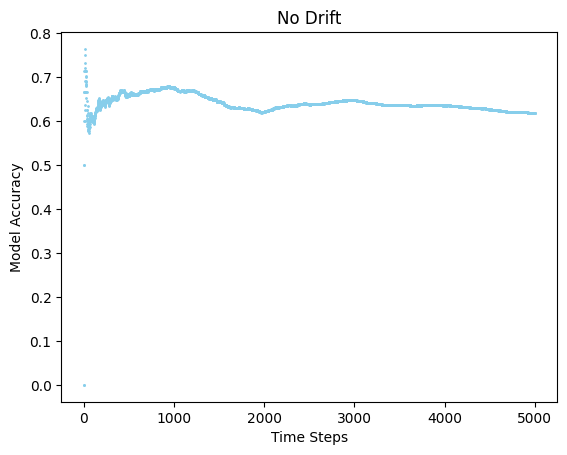

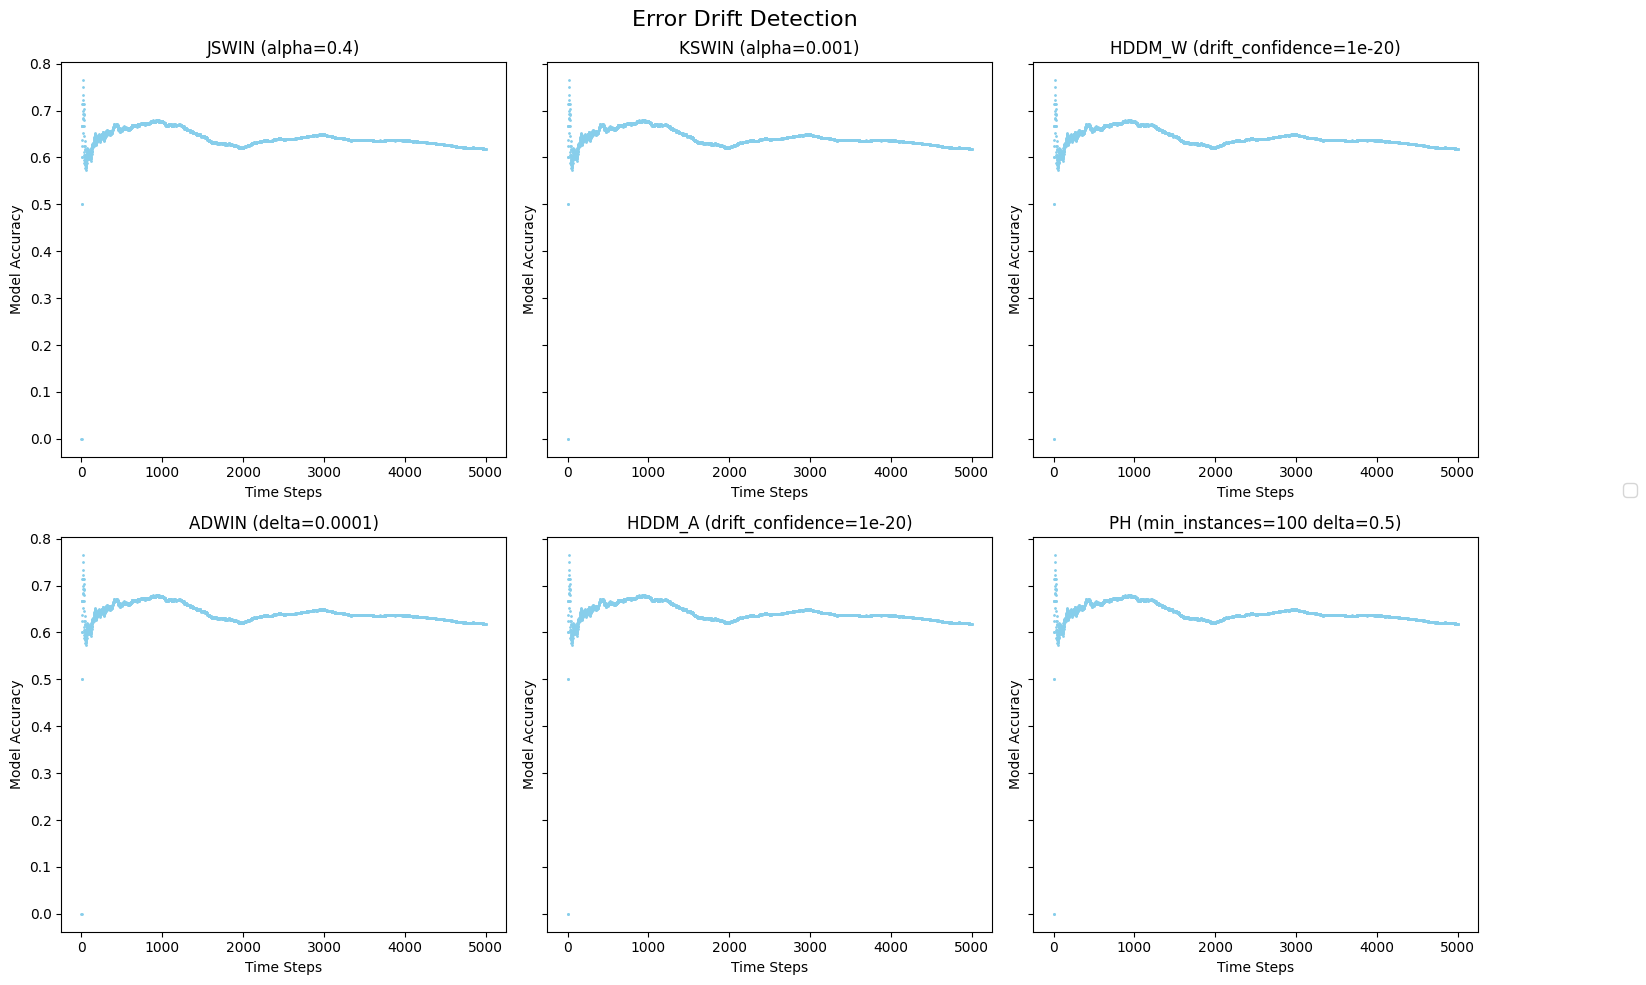

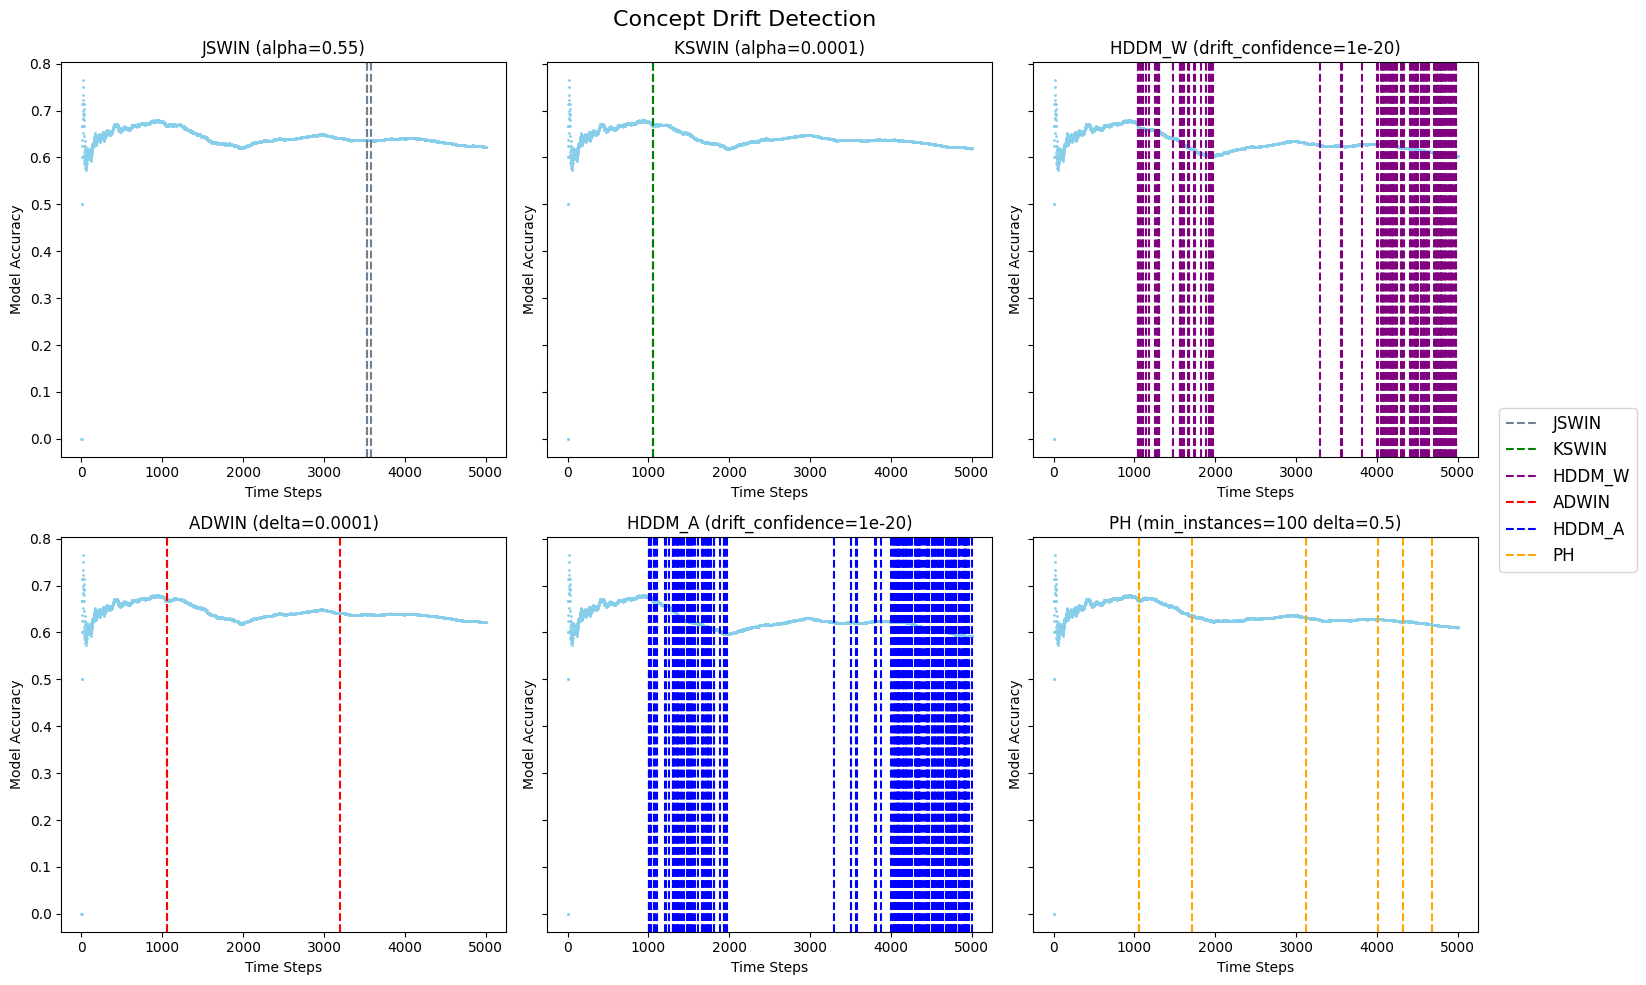

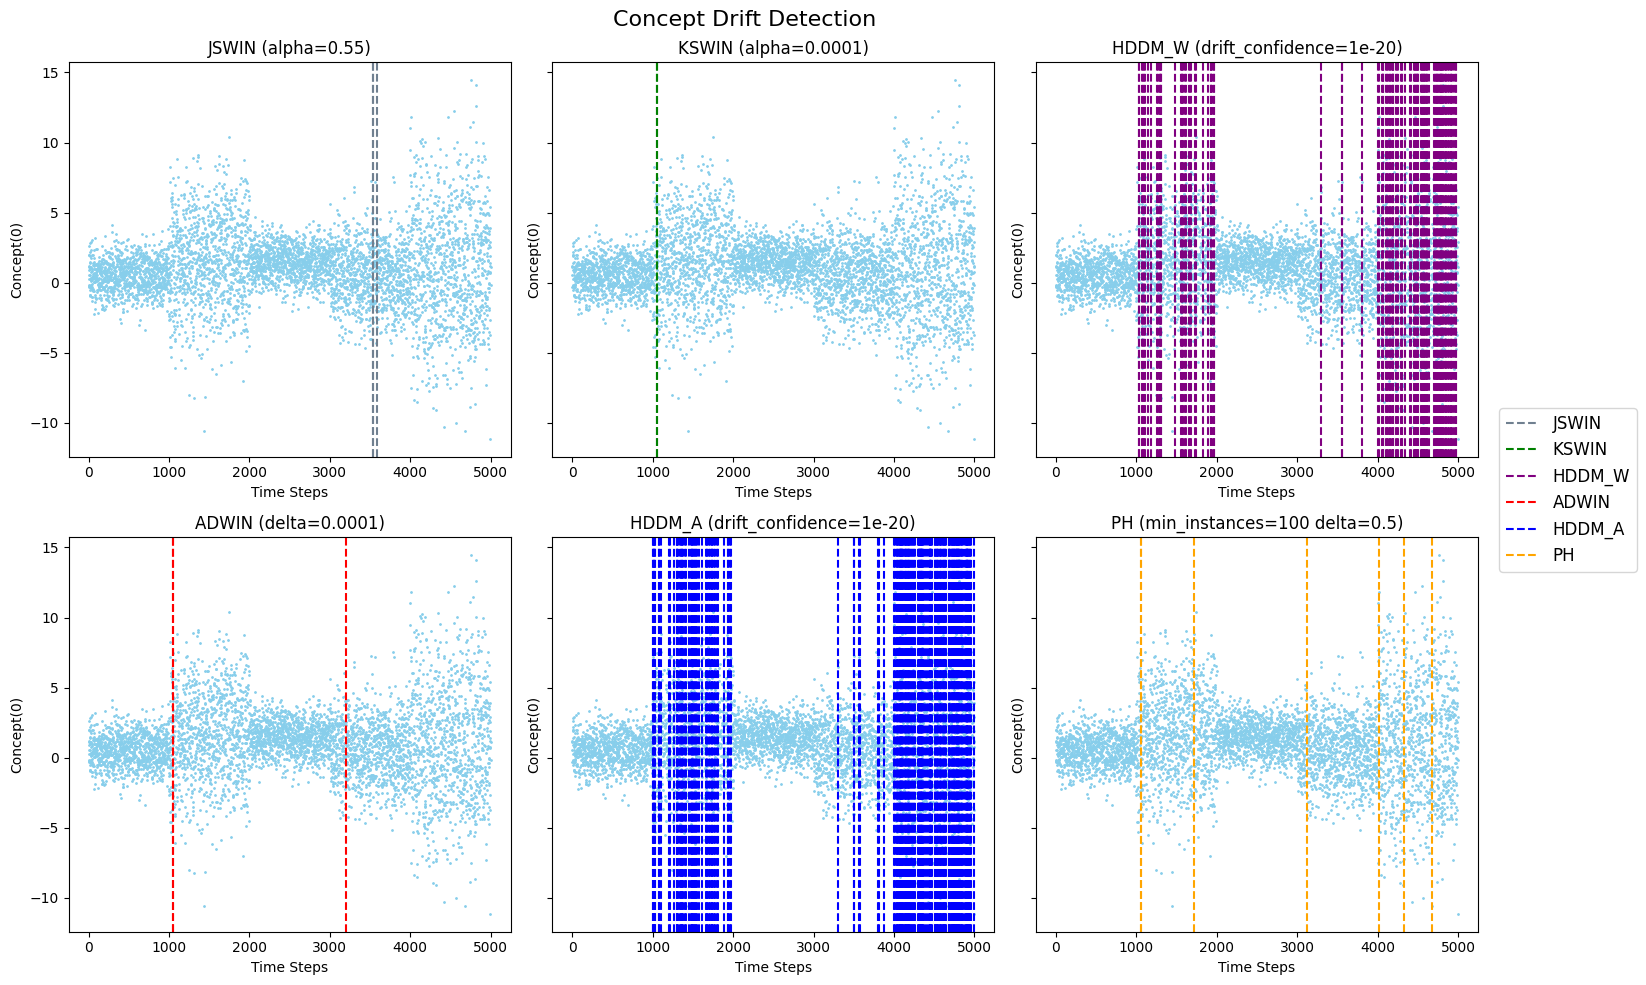

In [ ]:
artifical_ds = ArtificialDataStream(
    distribution_types=[np.random.normal for i in range(5)],
    pos_distribution_params=[
        (0, 1),
        (1, 3),
        (1, 1),
        (0, 2),
        (0.5, 4)
    ],
    neg_distribution_params=[
        (1, 1),
        (2, 3),
        (2, 1),
        (1, 2),
        (1.5, 4)
    ],
    samples_lens=[1000 for _ in range(5)]
)
artifical_ds.plot_stream()

window_size = 100
model_instance = tree.HoeffdingAdaptiveTreeClassifier

exp = Experiment(
    model_instance=model_instance,
    data_stream=artifical_ds,
    window_size=window_size,
    drift_col_id=0
)
exp.run()

exp.plot()

In [3]:
exp.get_average_accs()

detector_name,ADWIN,HDDM_A,HDDM_W,JSWIN,KSWIN,No Detector,PH
drift_type,,,,,,,
CONCEPT,0.642530,0.626640,0.631533,0.642366,0.641559,NaN,0.636889
ERROR,0.641174,0.641174,0.641174,0.641174,0.641174,NaN,0.641174
NO_DRIFT,NaN,NaN,NaN,NaN,NaN,0.641174,NaN


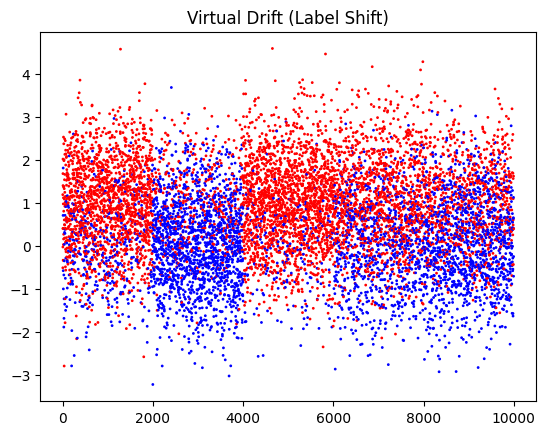

Finding optimal parameters for error detectors
Processing detector JSWIN with params alpha=0.3
Processing detector JSWIN with params alpha=0.4
Processing detector JSWIN with params alpha=0.45
Processing detector JSWIN with params alpha=0.5
Processing detector JSWIN with params alpha=0.55
Processing detector JSWIN with params alpha=0.6
Processing detector JSWIN with params alpha=0.65
Processing detector JSWIN with params alpha=0.7
Processing detector JSWIN with params alpha=0.8
Processing detector JSWIN with params alpha=0.9
Processing detector ADWIN with params delta=0.0001
Processing detector ADWIN with params delta=0.001
Processing detector KSWIN with params alpha=0.0001
Processing detector KSWIN with params alpha=0.001
Processing detector HDDM_A with params drift_confidence=1e-20
Processing detector HDDM_A with params drift_confidence=1e-15
Processing detector HDDM_W with params drift_confidence=1e-20
Processing detector HDDM_W with params drift_confidence=1e-15
Processing detector 

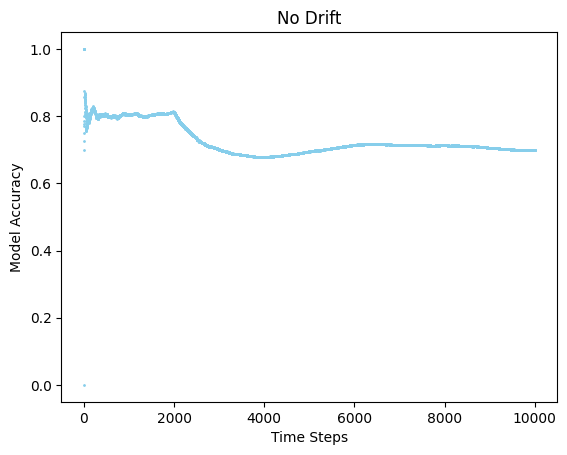

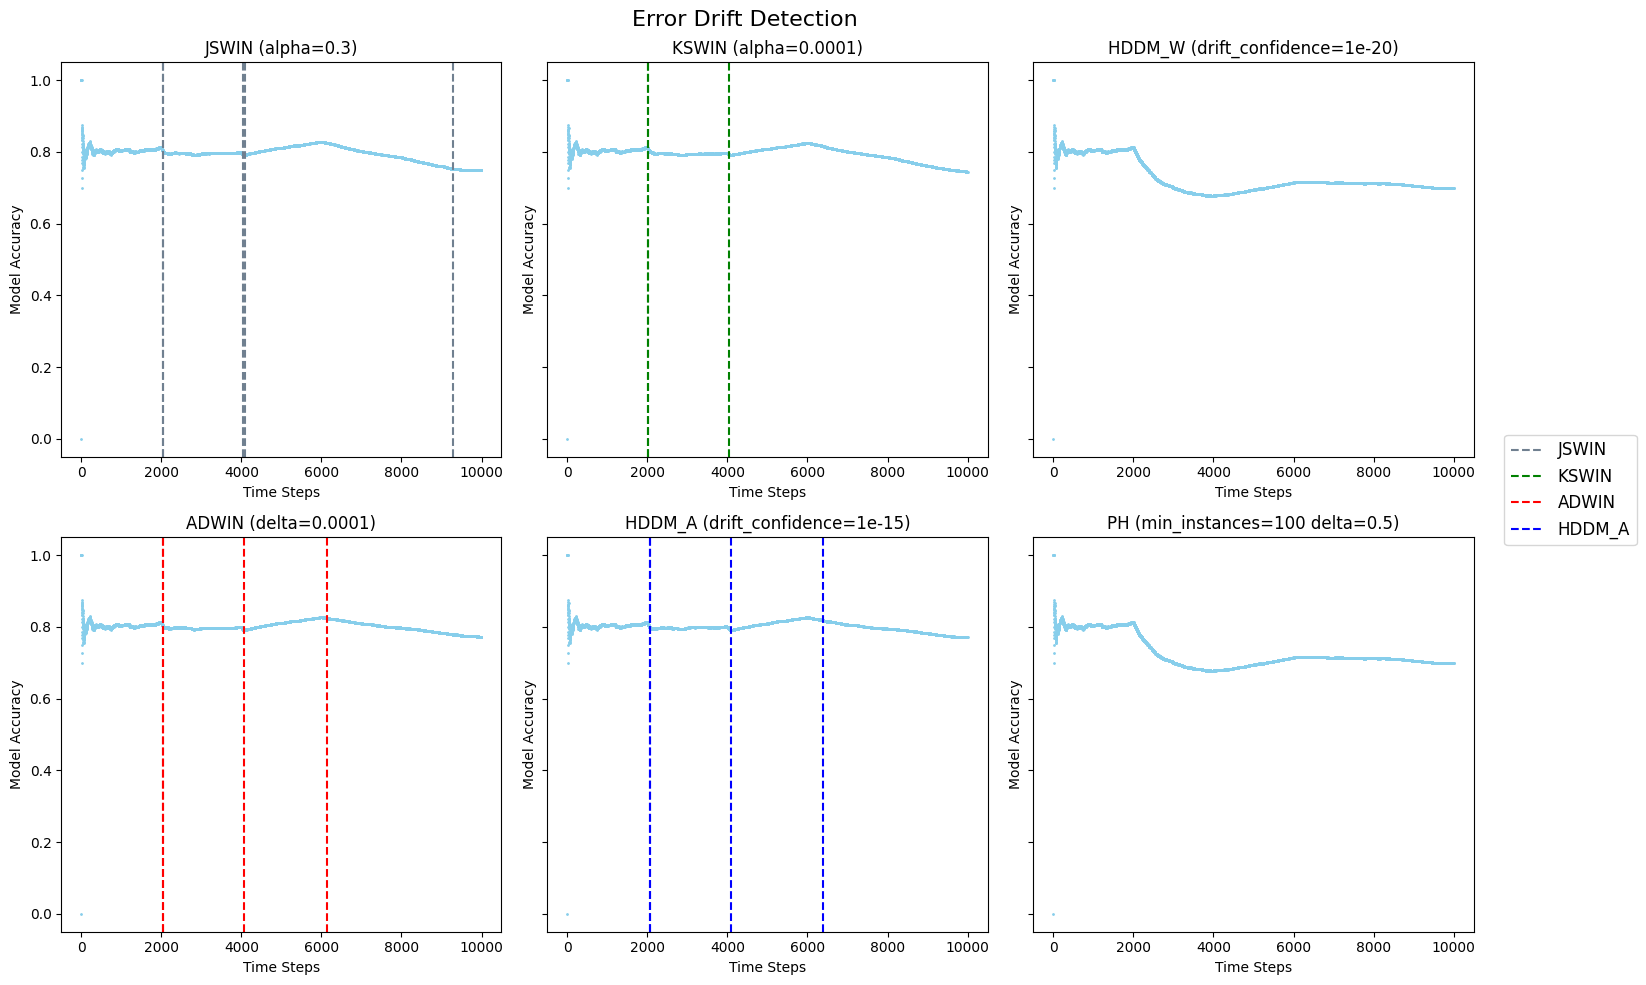

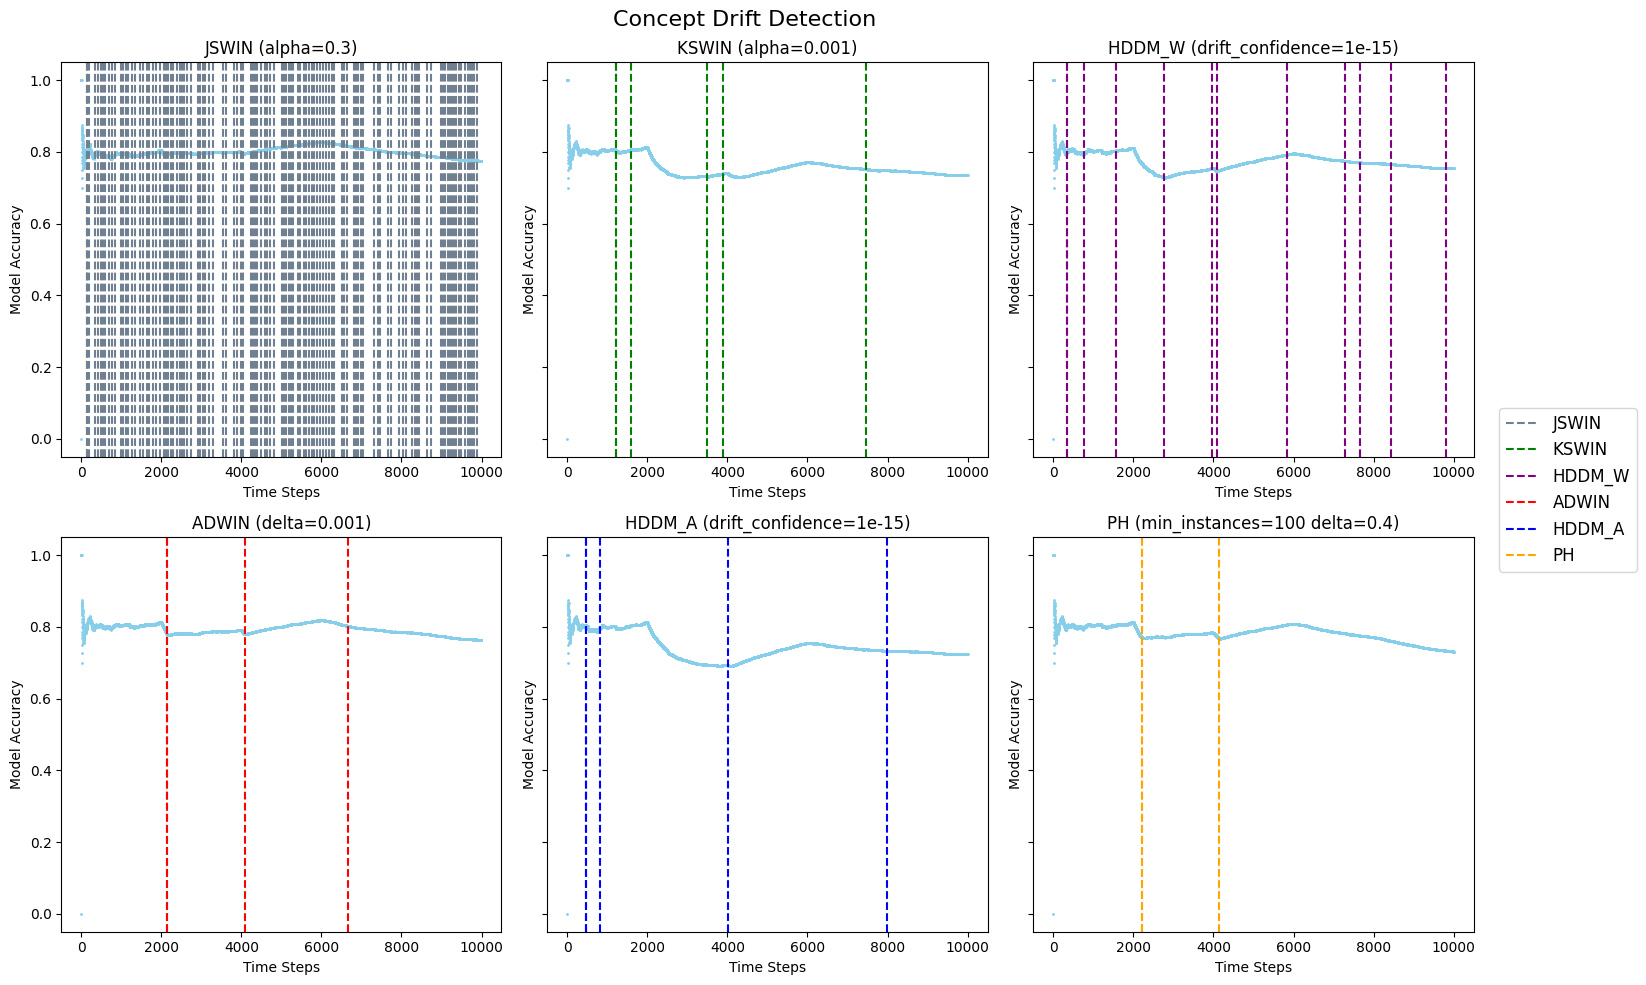

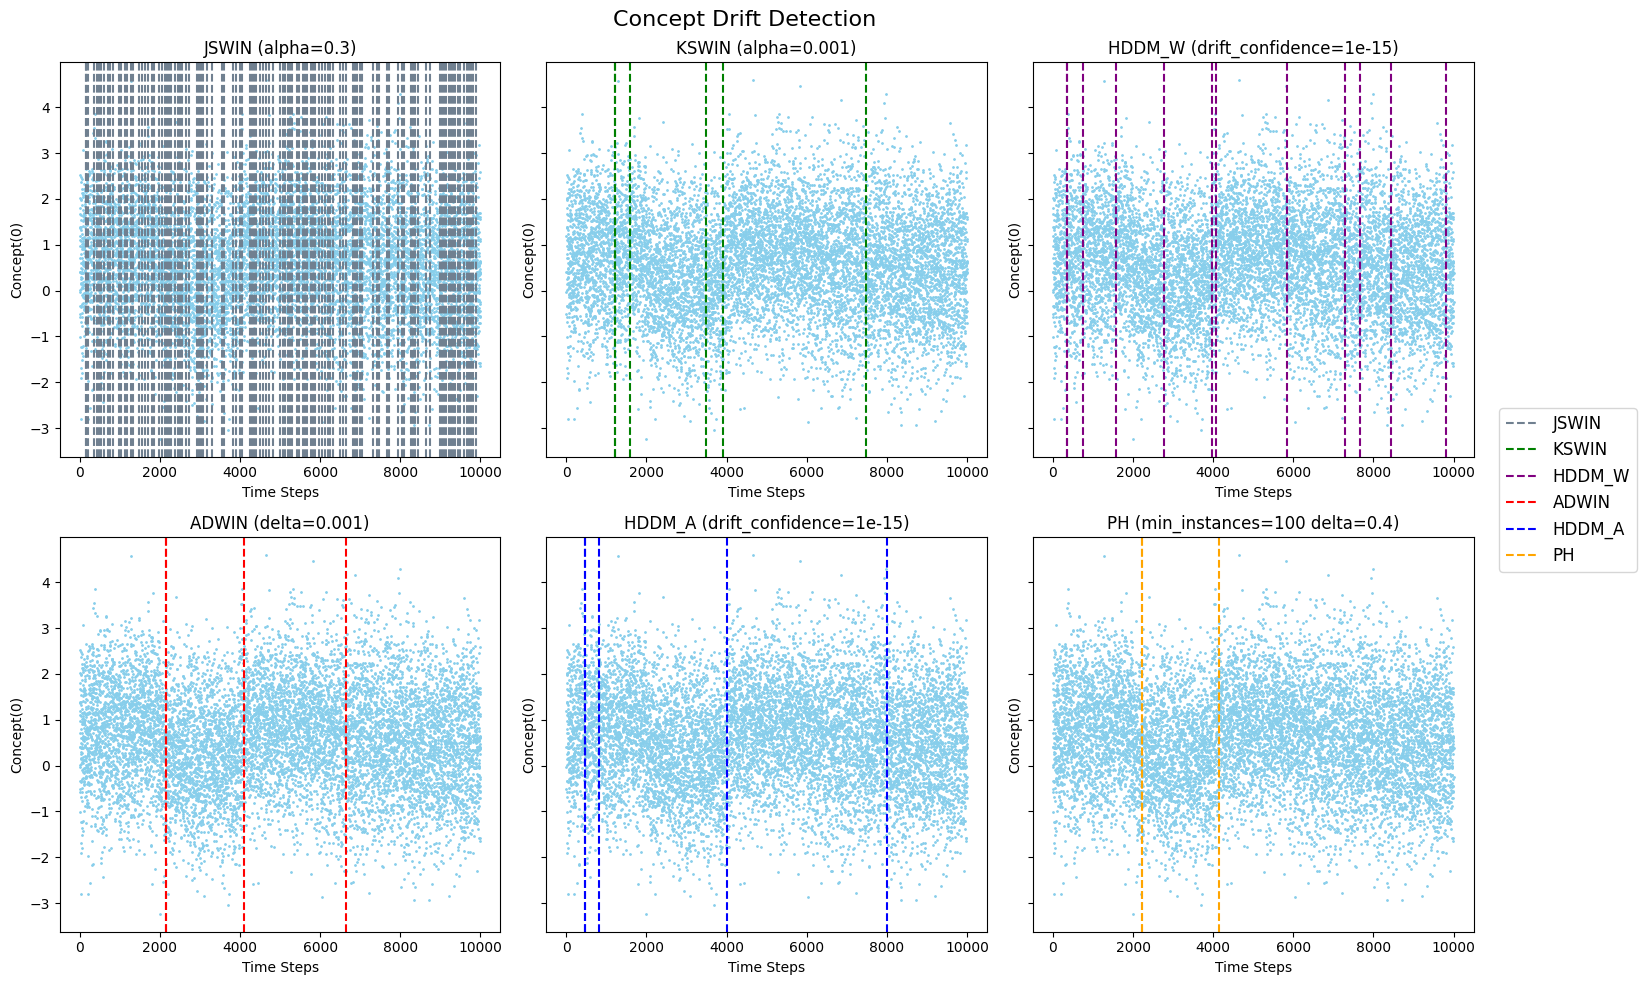

detector_name,ADWIN,HDDM_A,HDDM_W,JSWIN,KSWIN,No Detector,PH
drift_type,,,,,,,
CONCEPT,0.792868,0.743221,0.773123,0.800846,0.758907,NaN,0.781818
ERROR,0.801541,0.800697,0.726624,0.795711,0.794878,NaN,0.726624
NO_DRIFT,NaN,NaN,NaN,NaN,NaN,0.726624,NaN


In [4]:
label_shift_ds = LabelShiftDataStream(n=10000, ratios=[0.2, 0.8, 0.1, 0.4, 0.6])
label_shift_ds.plot_stream()

window_size = 100
model_instance = naive_bayes.GaussianNB

exp = Experiment(
    model_instance=model_instance,
    data_stream=label_shift_ds,
    window_size=window_size,
    drift_col_id=0
)
exp.run()

exp.plot()
exp.get_average_accs()

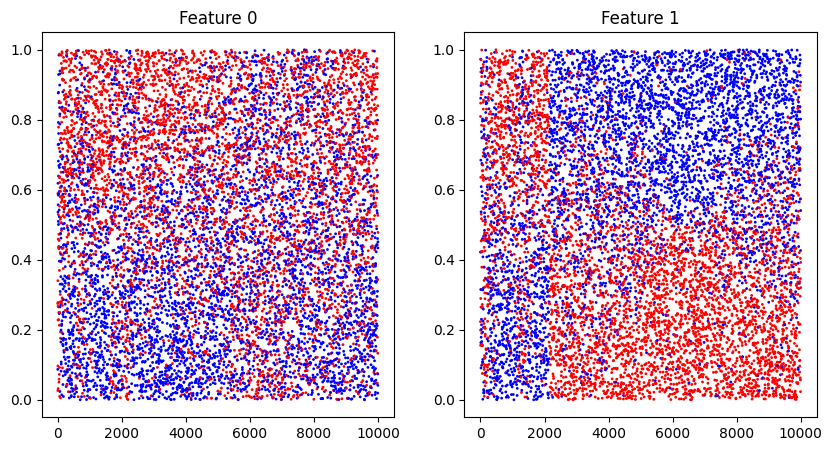

Finding optimal parameters for error detectors
Processing detector JSWIN with params alpha=0.3
Processing detector JSWIN with params alpha=0.4
Processing detector JSWIN with params alpha=0.45
Processing detector JSWIN with params alpha=0.5
Processing detector JSWIN with params alpha=0.55
Processing detector JSWIN with params alpha=0.6
Processing detector JSWIN with params alpha=0.65
Processing detector JSWIN with params alpha=0.7
Processing detector JSWIN with params alpha=0.8
Processing detector JSWIN with params alpha=0.9
Processing detector ADWIN with params delta=0.0001
Processing detector ADWIN with params delta=0.001
Processing detector KSWIN with params alpha=0.0001
Processing detector KSWIN with params alpha=0.001
Processing detector HDDM_A with params drift_confidence=1e-20
Processing detector HDDM_A with params drift_confidence=1e-15
Processing detector HDDM_W with params drift_confidence=1e-20
Processing detector HDDM_W with params drift_confidence=1e-15
Processing detector 

In [ ]:
hyperplane_ds = HyperPlaneStream(
    seed=42,
    n_drift_features=2,
    n_features=2,
    mag_change=0.3
)
hyperplane_ds.plot_stream()

window_size = 100
model_instance = naive_bayes.GaussianNB

exp = Experiment(
    model_instance=model_instance,
    data_stream=hyperplane_ds ,
    window_size=window_size,
    drift_col_id=1
)
exp.run()

exp.plot()
exp.get_average_accs()